In [546]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# DATA CLEANING AND PREPARATION

#### CUSTOMERS DATA CLEANING

In [549]:
customer_df = pd.read_csv(r"C:\Users\karan.shah\Desktop\Kaggle\Blinkit\blinkit_customers.csv")
customer_df["registration_date"] = pd.to_datetime(customer_df["registration_date"])
customer_df.dropna(inplace=True)
customer_df["phone"] = customer_df["phone"].astype(str).str.strip()
customer_df["email"] = customer_df["email"].str.strip()
customer_df["area"] = customer_df["area"].str.strip()

C:\Users\karan.shah\AppData\Local\Temp\ipykernel_14284\4174687965.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  customer_df["registration_date"] = pd.to_datetime(customer_df["registration_date"])


In [550]:
customer_df.head()

,customer_id,customer_name,email,phone,address,area,pincode,registration_date,customer_segment,total_orders,avg_order_value
0,97475543,Niharika Nagi,ektataneja@example.org,912988000000.0,"23, Nayar Path, Bihar Sharif-154625",Udupi,321865,2023-05-13,Premium,13,451.92
1,22077605,Megha Sachar,vedant45@example.com,915123000000.0,"51/302, Buch Chowk\nSrinagar-570271",Aligarh,149394,2024-06-18,Inactive,4,825.48
2,47822591,Hema Bahri,samiazaan@example.com,910034000000.0,"941\nAnne Street, Darbhanga 186125",Begusarai,621411,2024-09-25,Regular,17,1969.81
3,79726146,Zaitra Vig,ishanvi87@example.org,916264000000.0,"43/94, Ghosh, Alappuzha 635655",Kozhikode,826054,2023-10-04,New,4,220.09
4,57102800,Januja Verma,atideshpande@example.org,917294000000.0,"06\nOm, Ambarnath 477463",Ichalkaranji,730539,2024-03-22,Inactive,14,578.14


In [551]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        2500 non-null   int64         
 1   customer_name      2500 non-null   object        
 2   email              2500 non-null   object        
 3   phone              2500 non-null   object        
 4   address            2500 non-null   object        
 5   area               2500 non-null   object        
 6   pincode            2500 non-null   int64         
 7   registration_date  2500 non-null   datetime64[ns]
 8   customer_segment   2500 non-null   object        
 9   total_orders       2500 non-null   int64         
 10  avg_order_value    2500 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 215.0+ KB


#### ORDERS DATA CLEANING

In [553]:
orders_df = pd.read_csv(r"C:\Users\karan.shah\Desktop\Kaggle\Blinkit\blinkit_orders.csv")
orders_df["order_date"] = pd.to_datetime(orders_df["order_date"])
orders_df["promised_delivery_time"] = pd.to_datetime(orders_df["promised_delivery_time"])
orders_df["actual_delivery_time"] = pd.to_datetime(orders_df["actual_delivery_time"])
orders_df.dropna(inplace=True)
orders_df = orders_df[orders_df["order_total"] > 0]

C:\Users\karan.shah\AppData\Local\Temp\ipykernel_14284\3802870913.py:2: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  orders_df["order_date"] = pd.to_datetime(orders_df["order_date"])
C:\Users\karan.shah\AppData\Local\Temp\ipykernel_14284\3802870913.py:3: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  orders_df["promised_delivery_time"] = pd.to_datetime(orders_df["promised_delivery_time"])
C:\Users\karan.shah\AppData\Local\Temp\ipykernel_14284\3802870913.py:4: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  orders_df["actual_delivery_time"] = pd.to_datetime(orders_df["actual_delivery_time"])


In [554]:
orders_df.head()

,order_id,customer_id,order_date,promised_delivery_time,actual_delivery_time,delivery_status,order_total,payment_method,delivery_partner_id,store_id
0,1961864118,30065862,2024-07-17 08:34:00,2024-07-17 08:52:00,2024-07-17 08:47:00,On Time,3197.07,Cash,63230,4771
1,1549769649,9573071,2024-05-28 13:14:00,2024-05-28 13:25:00,2024-05-28 13:27:00,On Time,976.55,Cash,14983,7534
2,9185164487,45477575,2024-09-23 13:07:00,2024-09-23 13:25:00,2024-09-23 13:29:00,On Time,839.05,UPI,39859,9886
3,9644738826,88067569,2023-11-24 16:16:00,2023-11-24 16:34:00,2023-11-24 16:33:00,On Time,440.23,Card,61497,7917
4,5427684290,83298567,2023-11-20 05:00:00,2023-11-20 05:17:00,2023-11-20 05:18:00,On Time,2526.68,Cash,84315,2741


In [555]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   order_id                5000 non-null   int64         
 1   customer_id             5000 non-null   int64         
 2   order_date              5000 non-null   datetime64[ns]
 3   promised_delivery_time  5000 non-null   datetime64[ns]
 4   actual_delivery_time    5000 non-null   datetime64[ns]
 5   delivery_status         5000 non-null   object        
 6   order_total             5000 non-null   float64       
 7   payment_method          5000 non-null   object        
 8   delivery_partner_id     5000 non-null   int64         
 9   store_id                5000 non-null   int64         
dtypes: datetime64[ns](3), float64(1), int64(4), object(2)
memory usage: 390.8+ KB


#### DELIVARY PERFORMANCE CLEANING

In [557]:
delivery_df = pd.read_csv(r"C:\Users\karan.shah\Desktop\Kaggle\Blinkit\blinkit_delivery_performance.csv")
delivery_df["promised_time"] = pd.to_datetime(delivery_df["promised_time"])
delivery_df["actual_time"] = pd.to_datetime(delivery_df["actual_time"])
delivery_df["delivery_time_minutes"] = (delivery_df["actual_time"] - delivery_df["promised_time"]).dt.total_seconds() / 60
delivery_df.fillna("Unknown", inplace=True) 
delivery_df = delivery_df[delivery_df["distance_km"] >= 0]

C:\Users\karan.shah\AppData\Local\Temp\ipykernel_14284\1877283062.py:2: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  delivery_df["promised_time"] = pd.to_datetime(delivery_df["promised_time"])
C:\Users\karan.shah\AppData\Local\Temp\ipykernel_14284\1877283062.py:3: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  delivery_df["actual_time"] = pd.to_datetime(delivery_df["actual_time"])


In [558]:
delivery_df.head()

,order_id,delivery_partner_id,promised_time,actual_time,delivery_time_minutes,distance_km,delivery_status,reasons_if_delayed
0,1961864118,63230,2024-07-17 08:52:00,2024-07-17 08:47:00,-5.0,0.96,On Time,Unknown
1,1549769649,14983,2024-05-28 13:25:00,2024-05-28 13:27:00,2.0,0.98,On Time,Traffic
2,9185164487,39859,2024-09-23 13:25:00,2024-09-23 13:29:00,4.0,3.83,On Time,Traffic
3,9644738826,61497,2023-11-24 16:34:00,2023-11-24 16:33:00,-1.0,2.76,On Time,Unknown
4,5427684290,84315,2023-11-20 05:17:00,2023-11-20 05:18:00,1.0,2.63,On Time,Traffic


In [559]:
delivery_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   order_id               5000 non-null   int64         
 1   delivery_partner_id    5000 non-null   int64         
 2   promised_time          5000 non-null   datetime64[ns]
 3   actual_time            5000 non-null   datetime64[ns]
 4   delivery_time_minutes  5000 non-null   float64       
 5   distance_km            5000 non-null   float64       
 6   delivery_status        5000 non-null   object        
 7   reasons_if_delayed     5000 non-null   object        
dtypes: datetime64[ns](2), float64(2), int64(2), object(2)
memory usage: 312.6+ KB


#### PRODUCT DATA CLEANING

In [561]:
products_df = pd.read_csv(r"C:\Users\karan.shah\Desktop\Kaggle\Blinkit\blinkit_products.csv")
products_df.dropna(inplace=True)
products_df = products_df[products_df["price"] >= 0]

In [562]:
products_df.head()

,product_id,product_name,category,brand,price,mrp,margin_percentage,shelf_life_days,min_stock_level,max_stock_level
0,153019,Onions,Fruits & Vegetables,Aurora LLC,947.95,1263.93,25,3,13,88
1,11422,Potatoes,Fruits & Vegetables,Ramaswamy-Tata,127.16,169.55,25,3,20,65
2,669378,Potatoes,Fruits & Vegetables,Chadha and Sons,212.14,282.85,25,3,23,70
3,848226,Tomatoes,Fruits & Vegetables,Barad and Sons,209.59,279.45,25,3,10,51
4,890623,Onions,Fruits & Vegetables,"Sangha, Nagar and Varty",354.52,472.69,25,3,27,55


In [563]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268 entries, 0 to 267
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   product_id         268 non-null    int64  
 1   product_name       268 non-null    object 
 2   category           268 non-null    object 
 3   brand              268 non-null    object 
 4   price              268 non-null    float64
 5   mrp                268 non-null    float64
 6   margin_percentage  268 non-null    int64  
 7   shelf_life_days    268 non-null    int64  
 8   min_stock_level    268 non-null    int64  
 9   max_stock_level    268 non-null    int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 21.1+ KB


#### MARKETING CAMPAIGN DATA CLEANING

In [565]:
marketing_df = pd.read_csv(r"C:\Users\karan.shah\Desktop\Kaggle\Blinkit\blinkit_marketing_performance.csv")
marketing_df["date"] = pd.to_datetime(marketing_df["date"], format="%d-%m-%Y")
# marketing_df["date"] = pd.to_datetime(marketing_df["date"])
marketing_df.dropna(inplace=True) 
marketing_df = marketing_df[marketing_df["roas"] > 0]

In [566]:
marketing_df.head()


,campaign_id,campaign_name,date,target_audience,channel,impressions,clicks,conversions,spend,revenue_generated,roas
0,548299,New User Discount,2024-11-05,Premium,App,3130,163,78,1431.85,4777.75,3.60
1,390914,Weekend Special,2024-11-05,Inactive,App,3925,494,45,4506.34,6238.11,2.98
2,834385,Festival Offer,2024-11-05,Inactive,Email,7012,370,78,4524.23,2621.00,2.95
3,241523,Flash Sale,2024-11-05,Inactive,SMS,1115,579,86,3622.79,2955.00,2.84
4,595111,Membership Drive,2024-11-05,New Users,Email,7172,795,54,2888.99,8951.81,2.22


In [567]:
marketing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5400 entries, 0 to 5399
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   campaign_id        5400 non-null   int64         
 1   campaign_name      5400 non-null   object        
 2   date               5400 non-null   datetime64[ns]
 3   target_audience    5400 non-null   object        
 4   channel            5400 non-null   object        
 5   impressions        5400 non-null   int64         
 6   clicks             5400 non-null   int64         
 7   conversions        5400 non-null   int64         
 8   spend              5400 non-null   float64       
 9   revenue_generated  5400 non-null   float64       
 10  roas               5400 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(4), object(3)
memory usage: 464.2+ KB


#### INVENTORY DATA CLEANING

In [569]:
inventory_df = pd.read_csv(r"C:\Users\karan.shah\Desktop\Kaggle\Blinkit\blinkit_inventory.csv")
inventory_df.dropna(inplace=True)  
inventory_df = inventory_df[inventory_df["stock_received"] >= 0] 

In [570]:
inventory_df.head()

,product_id,date,stock_received,damaged_stock
0,153019,17-03-2023,4,2
1,848226,17-03-2023,4,2
2,965755,17-03-2023,1,0
3,39154,17-03-2023,4,0
4,34186,17-03-2023,3,2


In [571]:
inventory_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75172 entries, 0 to 75171
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   product_id      75172 non-null  int64 
 1   date            75172 non-null  object
 2   stock_received  75172 non-null  int64 
 3   damaged_stock   75172 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 2.3+ MB


#### CUSTOMER FEEDBACK DATA CLEANING

In [573]:
feedback_df = pd.read_csv(r"C:\Users\karan.shah\Desktop\Kaggle\Blinkit\blinkit_customer_feedback.csv")
feedback_df["feedback_date"] = pd.to_datetime(feedback_df["feedback_date"])
feedback_df.dropna(inplace=True)

C:\Users\karan.shah\AppData\Local\Temp\ipykernel_14284\3298131258.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  feedback_df["feedback_date"] = pd.to_datetime(feedback_df["feedback_date"])


In [574]:
feedback_df.head()

,feedback_id,order_id,customer_id,rating,feedback_text,feedback_category,sentiment,feedback_date
0,2234710,1961864118,30065862,4,"It was okay, nothing special.",Delivery,Neutral,2024-07-17
1,5450964,1549769649,9573071,3,The order was incorrect.,App Experience,Negative,2024-05-28
2,482108,9185164487,45477575,3,"It was okay, nothing special.",App Experience,Neutral,2024-09-23
3,4823104,9644738826,88067569,4,The product met my expectations.,App Experience,Neutral,2023-11-24
4,3537464,5427684290,83298567,3,Product was damaged during delivery.,Delivery,Negative,2023-11-20


In [575]:
feedback_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   feedback_id        5000 non-null   int64         
 1   order_id           5000 non-null   int64         
 2   customer_id        5000 non-null   int64         
 3   rating             5000 non-null   int64         
 4   feedback_text      5000 non-null   object        
 5   feedback_category  5000 non-null   object        
 6   sentiment          5000 non-null   object        
 7   feedback_date      5000 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 312.6+ KB


#### ORDER ITEMS DATA CLEANING

In [577]:
order_items_df = pd.read_csv(r"C:\Users\karan.shah\Desktop\Kaggle\Blinkit\blinkit_order_items.csv")
order_items_df.dropna(inplace=True)
order_items_df = order_items_df[order_items_df["quantity"] > 0]

In [578]:
order_items_df.head()

,order_id,product_id,quantity,unit_price
0,1961864118,642612,3,517.03
1,1549769649,378676,1,881.42
2,9185164487,741341,2,923.84
3,9644738826,561860,1,874.78
4,5427684290,602241,2,976.55


In [579]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   order_id    5000 non-null   int64  
 1   product_id  5000 non-null   int64  
 2   quantity    5000 non-null   int64  
 3   unit_price  5000 non-null   float64
dtypes: float64(1), int64(3)
memory usage: 156.4 KB


#### NEW INVENTORY DATA CLEANING

In [581]:
inventory_new_df = pd.read_csv(r"C:\Users\karan.shah\Desktop\Kaggle\Blinkit\blinkit_inventoryNew.csv")
inventory_new_df.dropna(inplace=True)
inventory_new_df = inventory_new_df[inventory_new_df["stock_received"] >= 0]

In [582]:
inventory_new_df.head()

,product_id,date,stock_received,damaged_stock
0,153019,Mar-23,4,1
1,848226,Mar-23,4,1
2,965755,Mar-23,1,0
3,39154,Mar-23,4,0
4,34186,Mar-23,3,1


In [583]:
inventory_new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18105 entries, 0 to 18104
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   product_id      18105 non-null  int64 
 1   date            18105 non-null  object
 2   stock_received  18105 non-null  int64 
 3   damaged_stock   18105 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 565.9+ KB


#### CATEGORY ICONS DATA CLEANING

In [585]:
category_icons_df = pd.read_excel(r"C:\Users\karan.shah\Desktop\Kaggle\Blinkit\Category_Icons.xlsx")
category_icons_df.dropna(inplace=True)
category_icons_df["category"] = category_icons_df["category"].str.strip()

In [586]:
category_icons_df.head()

,category,Img
0,Grocery & Staples,https://i.postimg.cc/jSc7fmbs/grocery.png
1,Household Care,https://i.postimg.cc/1tnnLzNt/cleaning-tools.png
2,Personal Care,https://i.postimg.cc/hvmm7GSw/personal-care.png
3,Baby Care,https://i.postimg.cc/k55tvsJW/feeding.png
4,Pet Care,https://i.postimg.cc/FRMdmQjx/pet-food.png


In [587]:
category_icons_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  11 non-null     object
 1   Img       11 non-null     object
dtypes: object(2)
memory usage: 308.0+ bytes


#### RATING ICONS DATA CLEANING

In [589]:
rating_icons_df = pd.read_excel(r"C:\Users\karan.shah\Desktop\Kaggle\Blinkit\Rating_Icon.xlsx")
rating_icons_df.dropna(inplace=True)

In [590]:
rating_icons_df.head(10)

,Rating,Emoji,Star
0,1,https://i.postimg.cc/15zP0XBY/angry.png,⭐
1,2,https://i.postimg.cc/zGbrMQ9C/sad.png,⭐⭐
2,3,https://i.postimg.cc/d02zccny/confused.png,⭐⭐⭐
3,4,https://i.postimg.cc/X7XSGhNR/smile.png,⭐⭐⭐⭐
4,5,https://i.postimg.cc/XYyRxCCx/star.png,⭐⭐⭐⭐⭐


In [591]:
rating_icons_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Rating  5 non-null      int64 
 1   Emoji   5 non-null      object
 2   Star    5 non-null      object
dtypes: int64(1), object(2)
memory usage: 252.0+ bytes


In [592]:
sns.set_style("whitegrid")

# VIZUALIZATION

#### 1. Customer Registration Distribution

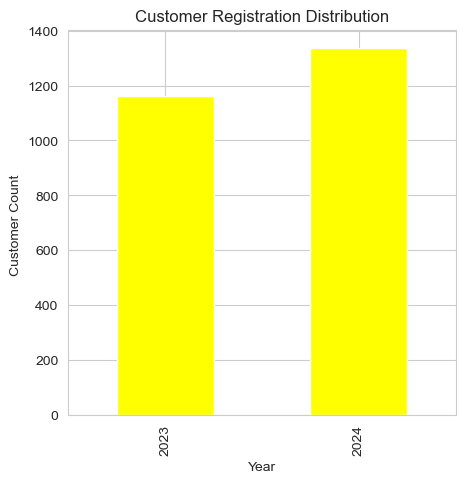

In [595]:
plt.figure(figsize=(5,5))
customer_df["registration_date"].dt.year.value_counts().sort_index().plot(kind="bar", color="yellow")
plt.title("Customer Registration Distribution")
plt.xlabel("Year")
plt.ylabel("Customer Count ")
plt.show()

#### 2. Daily Orders Trend

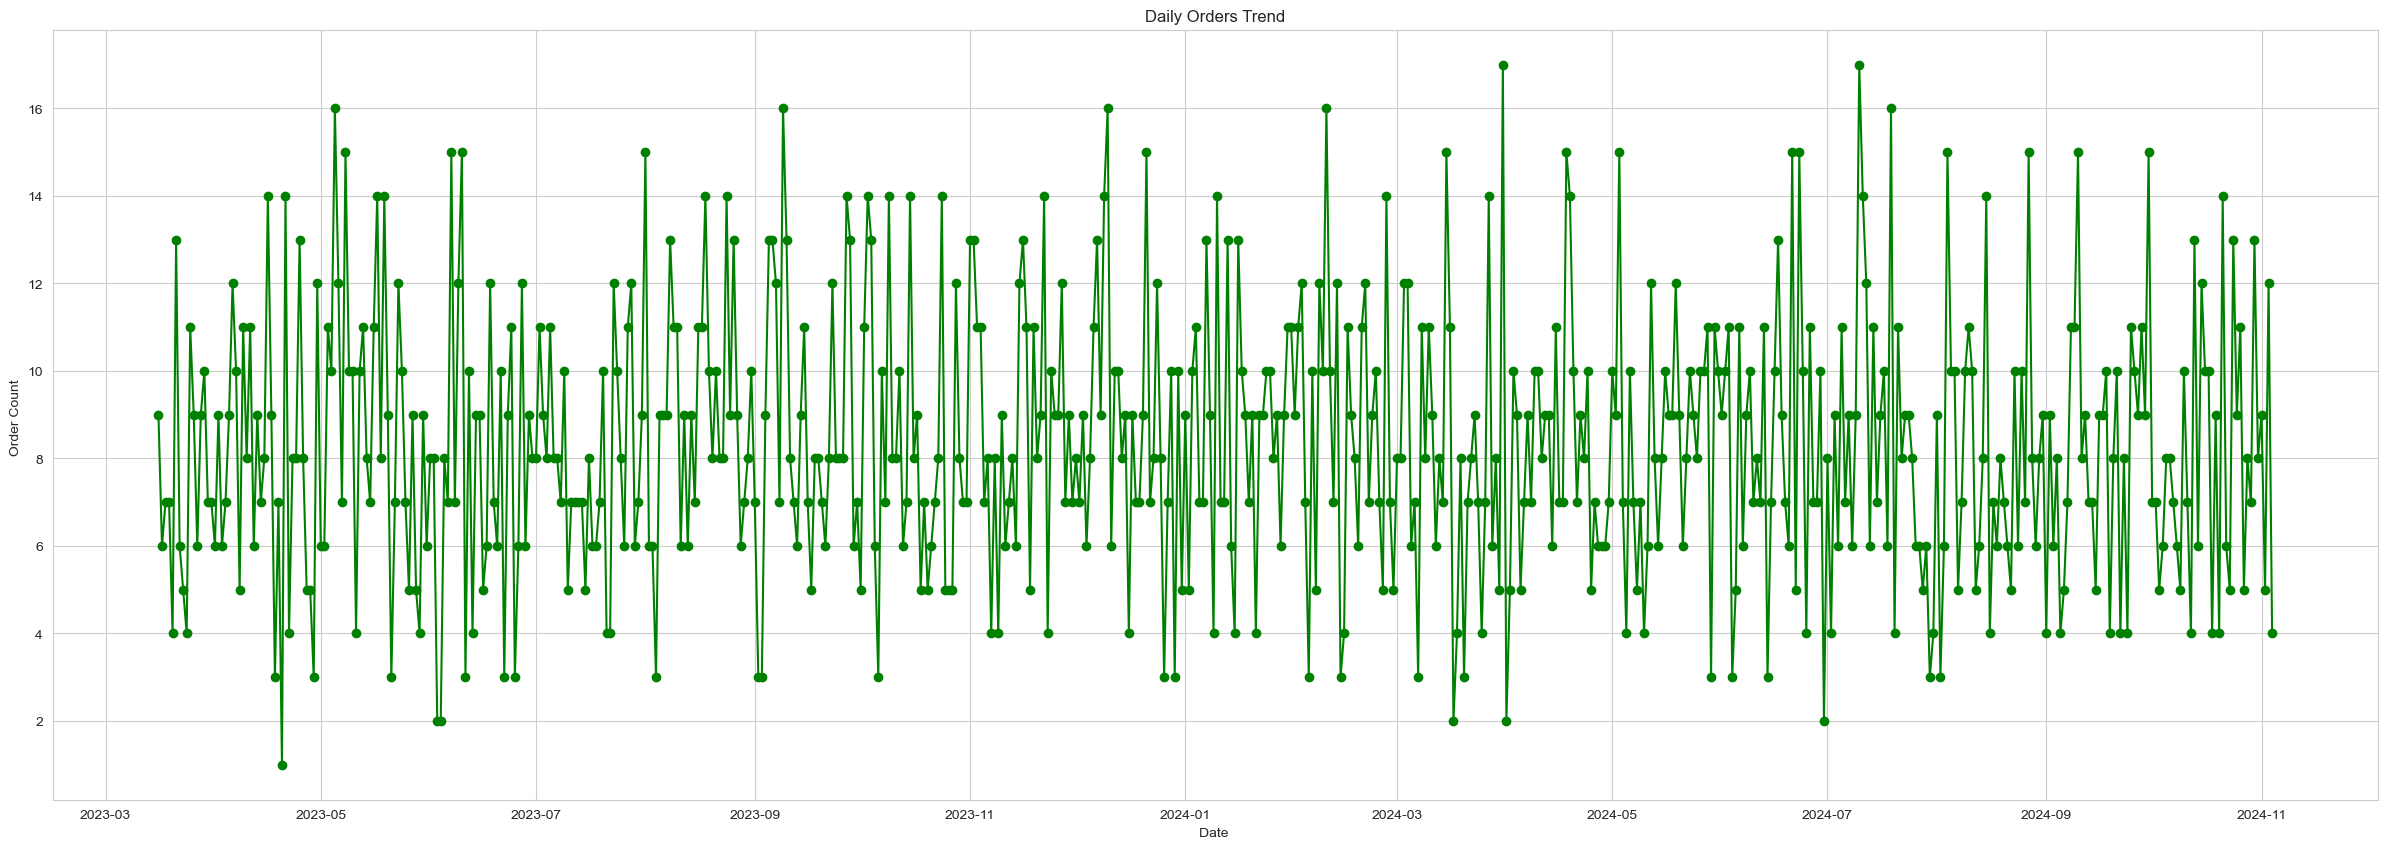

In [597]:
plt.figure(figsize=(30,10))
orders_df.groupby(orders_df["order_date"].dt.date).size().plot(kind="line", marker="o", color="green")
plt.title("Daily Orders Trend")
plt.xlabel("Date ")
plt.ylabel("Order Count ")
plt.show()

#### 3. Orders by Hour

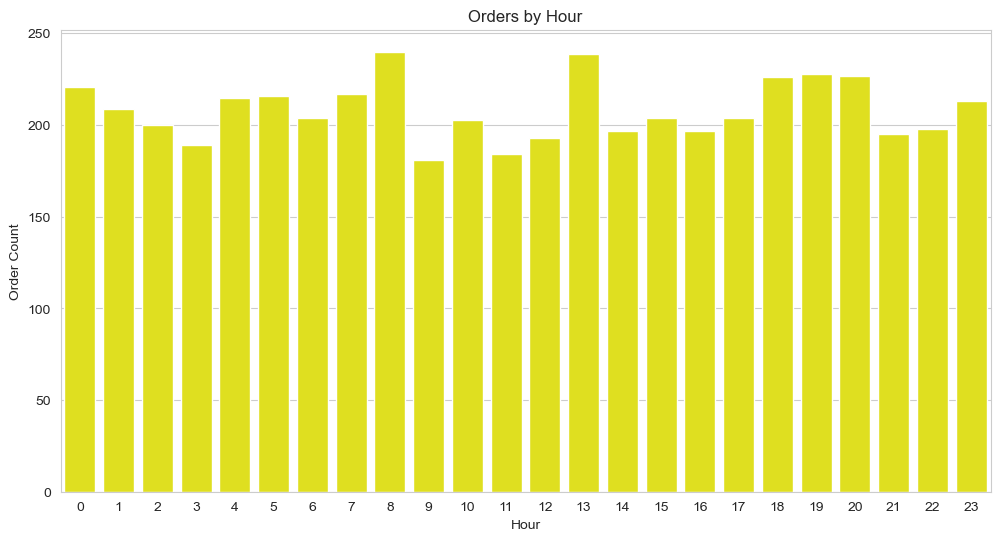

In [599]:
plt.figure(figsize=(12,6))
orders_df["hour"] = pd.to_datetime(orders_df["order_date"]).dt.hour
sns.countplot(x=orders_df["hour"], color="yellow")
plt.title("Orders by Hour")
plt.xlabel("Hour")
plt.ylabel("Order Count")
plt.show()

#### 4. Orders by Area

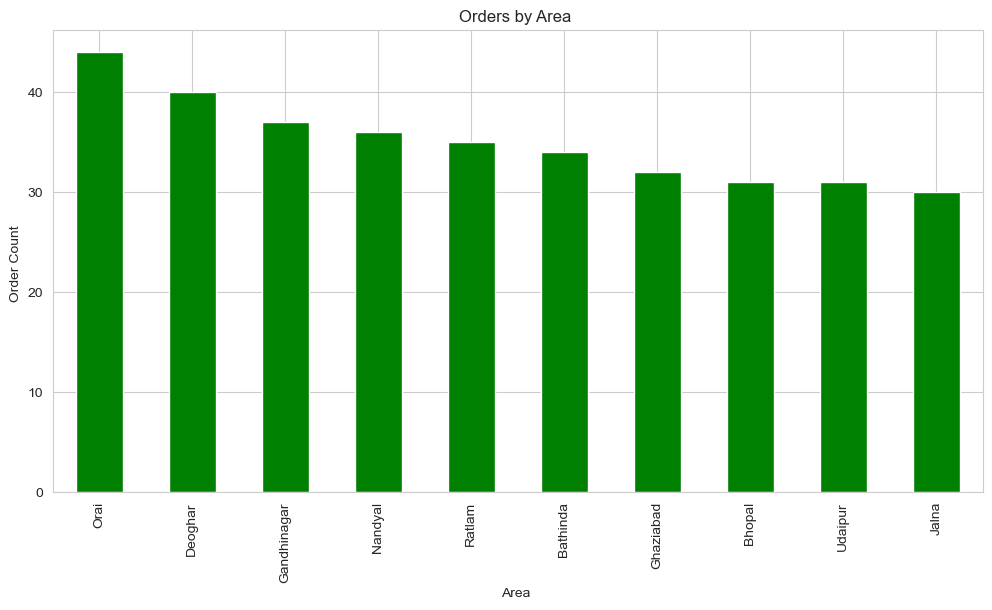

In [601]:
plt.figure(figsize=(12,6))
customer_orders = orders_df.merge(customer_df, on="customer_id", how="left")
customer_orders["area"].value_counts().nlargest(10).plot(kind="bar", color="green")
plt.title("Orders by Area ")
plt.xlabel("Area ")
plt.ylabel("Order Count ")
plt.show()

#### 5. Customer Segmentation

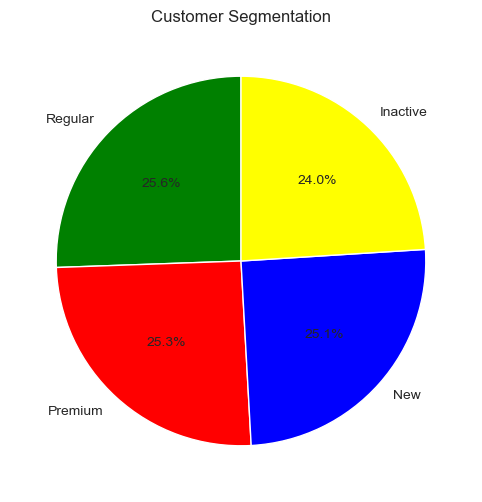

In [603]:
plt.figure(figsize=(12,6))
customer_df["customer_segment"].value_counts().plot(kind="pie", autopct='%1.1f%%', colors=["green", "red", "blue", "yellow"], startangle=90)
plt.title("Customer Segmentation")
plt.ylabel("")
plt.show()

#### 6. Sales by Product Category

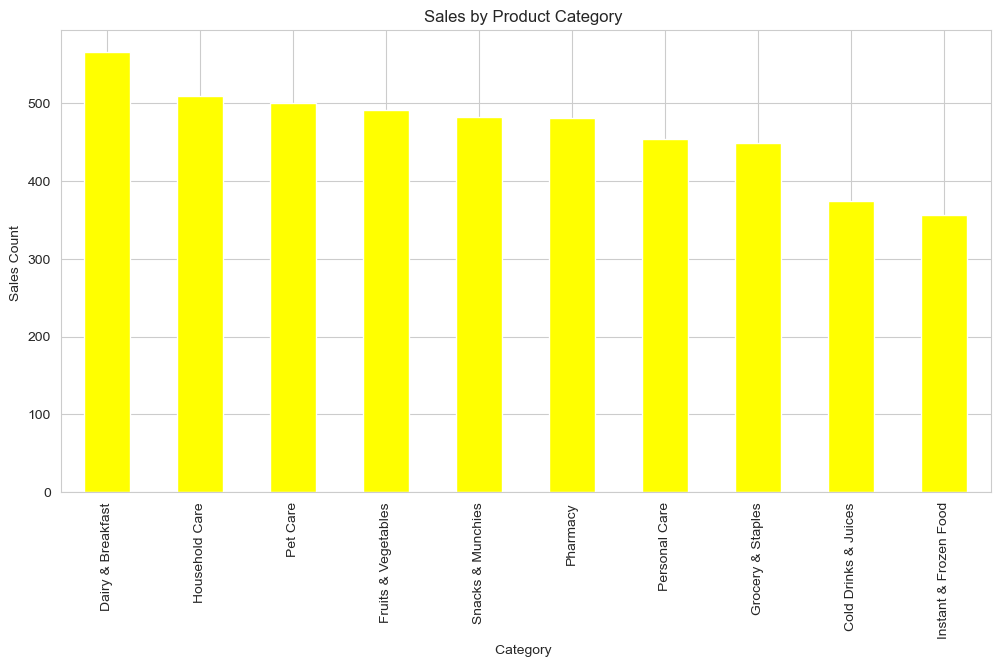

In [605]:
plt.figure(figsize=(12,6))
product_sales = order_items_df.merge(products_df, on="product_id", how="left")
product_sales["category"].value_counts().nlargest(10).plot(kind="bar", color="yellow")
plt.title("Sales by Product Category ")
plt.xlabel("Category ")
plt.ylabel("Sales Count ")
plt.show()

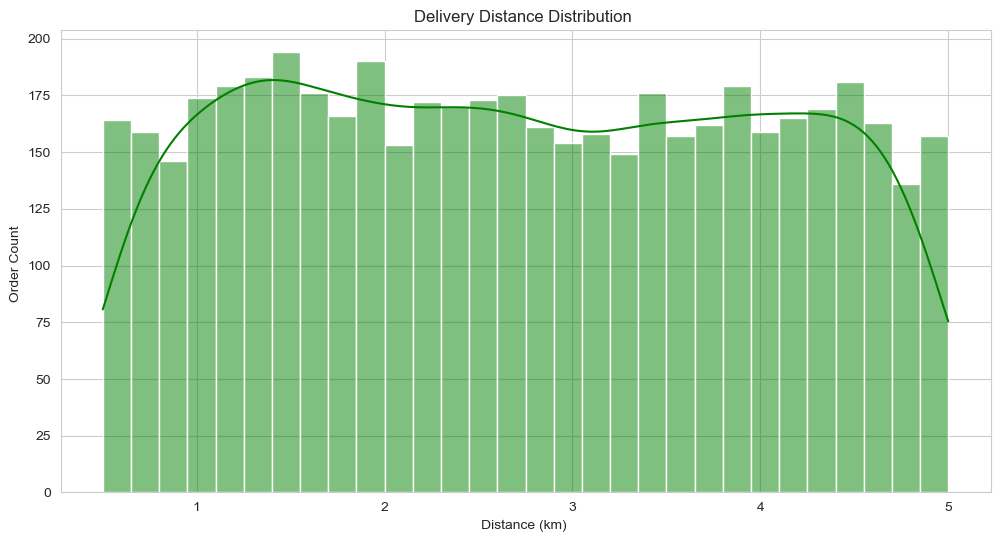

In [606]:
plt.figure(figsize=(12,6))
sns.histplot(delivery_df["distance_km"], bins=30, kde=True, color="green")
plt.title("Delivery Distance Distribution ")
plt.xlabel("Distance (km) ")
plt.ylabel("Order Count ")
plt.show()

#### 8.Orders by Day of Week

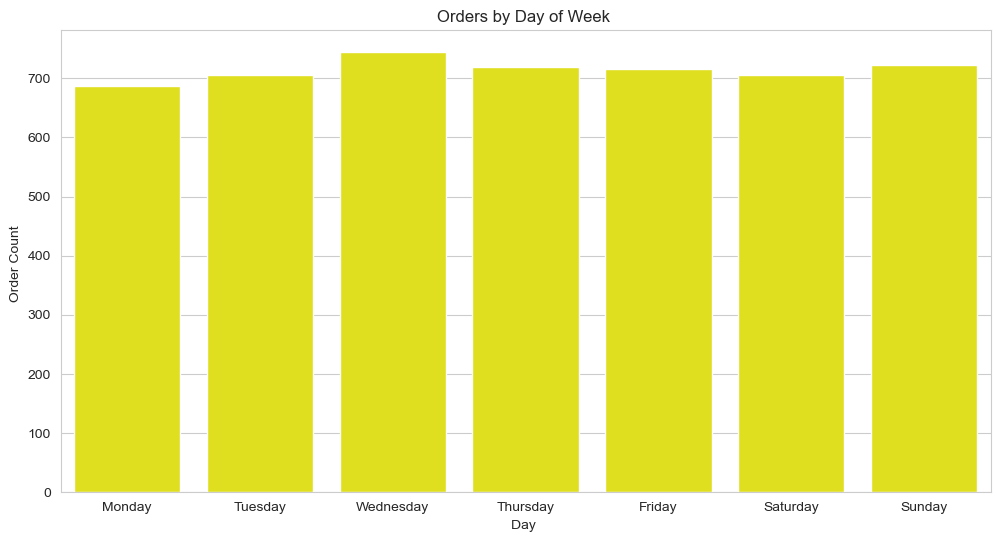

In [608]:
plt.figure(figsize=(12,6))
orders_df["day_of_week"] = pd.to_datetime(orders_df["order_date"]).dt.day_name()
sns.countplot(x=orders_df["day_of_week"], order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], color="yellow")
plt.title("Orders by Day of Week ")
plt.xlabel("Day ")
plt.ylabel("Order Count ")
plt.show()

#### 9.Orders by Season

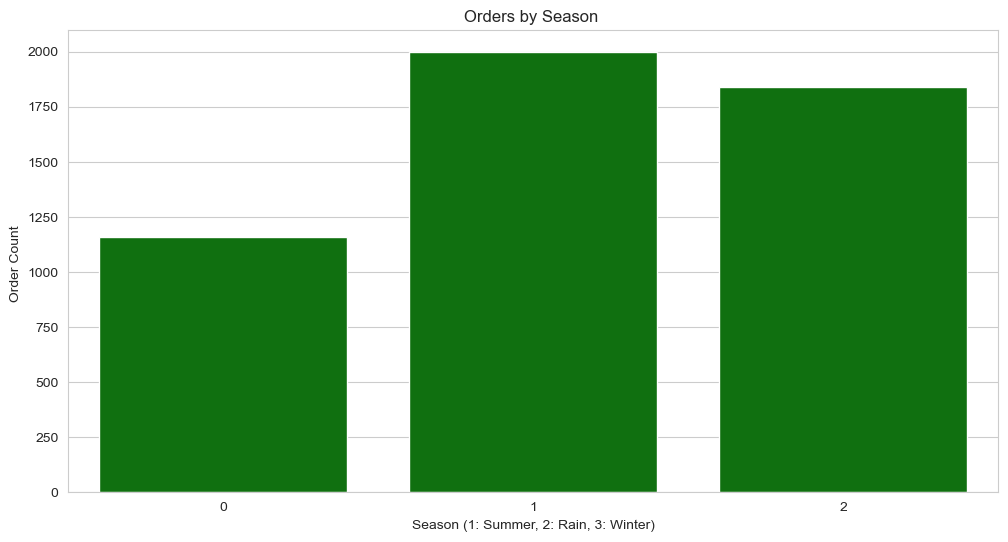

In [610]:
plt.figure(figsize=(12,6))
orders_df["season"] = orders_df["order_date"].dt.month % 12 // 4
sns.countplot(x=orders_df["season"], color="green")
plt.title("Orders by Season ")
plt.xlabel("Season (1: Summer, 2: Rain, 3: Winter)")
plt.ylabel("Order Count ")
plt.show()

#### 10.Stock Damage Rate Analysis

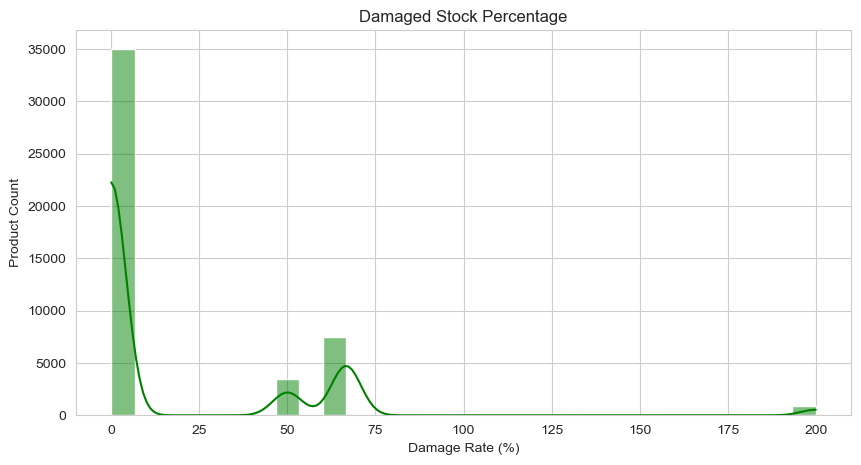

In [612]:
plt.figure(figsize=(10,5))
inventory_df["damage_rate"] = inventory_df["damaged_stock"] / inventory_df["stock_received"] * 100
sns.histplot(inventory_df["damage_rate"], bins=30, kde=True, color="green")
plt.title("Damaged Stock Percentage")
plt.xlabel("Damage Rate (%)")
plt.ylabel("Product Count")
plt.show()